# I've just run a new experiment, now I want to create an intake-esm catalog for that experiment

The `catalog_manager` Python library provides a number of Builders for different model outputs in its `esmcat` module

In [1]:
from catalog_manager import esmcat

from inspect import getmembers, isclass

In [2]:
getmembers(esmcat, isclass)

[('AccessCm2Builder', catalog_manager.esmcat.accessesm15.AccessEsm15Builder),
 ('AccessEsm15Builder', catalog_manager.esmcat.accessesm15.AccessEsm15Builder),
 ('AccessOm2Builder', catalog_manager.esmcat.accessom2.AccessOm2Builder)]

You can use these to create an intake-esm catalog for your recently created data. For example, let's create an intake-esm catalog for the ACCESS-OM2 COSIMA experiment at `/g/data/ik11/outputs/access-om2/1deg_jra55v14_ryf`.

Because this is an ACCESS-OM2 experiment, we'll use the `AccessOm2Builder`

In [3]:
%%time

catalog_builder = esmcat.AccessOm2Builder(
    path="/g/data/ik11/outputs/access-om2/1deg_jra55v14_ryf"
).build()

catalog_builder.save(
    name="mycatalog", 
    description="One sentence description of my experiment", 
)

Successfully wrote ESM catalog json file to: file:///g/data/tm70/ds0092/projects/nri_intake_catalog/notebooks/mycatalog.json
CPU times: user 4.3 s, sys: 1.75 s, total: 6.06 s
Wall time: 18.1 s


Now you can use your intake-esm catalog to load and analyse your data

In [4]:
import intake

cat = intake.open_esm_datastore("mycatalog.json", columns_with_iterables=["variable"])

In [5]:
ds = cat.search(variable="temp").to_dask()

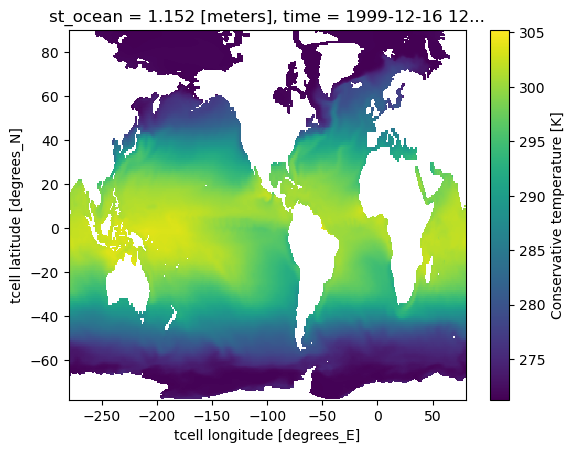

In [6]:
ds["temp"].sel(time="1999-12").sel(st_ocean=1, method="nearest").plot()

# What if a Builder doesn't exist for my experiment?

This documentation is yet to be written